In [1]:
import pandas as pd
from pandas import Series, DataFrame
import os
import datetime
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv(r"c:/Python\appstore_games.csv")
# df.duplicated(subset = ['ID']).count()
# df.head()

In [3]:
df['Current Version Release Date']=pd.to_datetime(df['Current Version Release Date'])
df['Original Release Date']=pd.to_datetime(df['Original Release Date'])
df['Update'] = (pd.to_datetime(df['Current Version Release Date']))-(pd.to_datetime(df['Original Release Date']))
df['Update'] = df['Update'] / np.timedelta64(1, 'D')
df.columns

Index(['URL', 'ID', 'Name', 'Subtitle', 'Icon URL', 'Average User Rating',
       'User Rating Count', 'Price', 'In-app Purchases', 'Description',
       'Developer', 'Age Rating', 'Languages', 'Size', 'Primary Genre',
       'Genres', 'Original Release Date', 'Current Version Release Date',
       'Update'],
      dtype='object')

In [4]:
df.rename(columns = {'Average User Rating' : 'Average_User_Rating', 'Age Rating': 'Age_Rating',
       'User Rating Count' : 'User_Rating_Count', 'In-app Purchases' : 'In-app_Purchases', 'Age Rating' : 'Age_Rating'}, inplace = True)

In [5]:
def trans_age(x):
    if x == '4+':
        return 4
    if x == '9+':
        return 9
    if x == '12+':
        return 12
    if x == '17+':
        return 17
df['Trans_Age'] = df['Age_Rating'].apply(trans_age)

In [6]:
df['lista_lang']=list(df['Languages'].str.split(','))
df['Lang_qty']=df['lista_lang'].str.len()

In [7]:
df['Income'] = df['User_Rating_Count']*1 + df['Price']
# print(df['Income'])

In [8]:
df['Original_Release_Date']=pd.to_numeric(df['Original Release Date'])
# print(df['Original_Release_Date'])

In [9]:
df[['Trans_Age',  'Size', 'User_Rating_Count', 'Lang_qty', 'Average_User_Rating', 
    'Original_Release_Date', 'Update', 'Price', 'In-app_Purchases',  'Income']].describe()

,Trans_Age,Size,User_Rating_Count,Lang_qty,Average_User_Rating,Original_Release_Date,Update,Price,Income
count,17007.000000,1.700600e+04,7.561000e+03,16947.000000,7561.000000,1.700700e+04,17007.000000,16983.000000,7.561000e+03
mean,6.204386,1.157064e+08,3.306531e+03,3.260105,4.060905,1.456880e+18,418.034868,0.813419,3.307103e+03
std,3.623524,2.036477e+08,4.232256e+04,6.170621,0.751428,7.240176e+16,691.086181,7.835732,4.232253e+04
min,4.000000,5.132800e+04,5.000000e+00,1.000000,1.000000,1.199750e+18,-333.000000,0.000000,5.000000e+00
25%,4.000000,2.295014e+07,1.200000e+01,1.000000,3.500000,1.412122e+18,0.000000,0.000000,1.300000e+01
50%,4.000000,5.676895e+07,4.600000e+01,1.000000,4.500000,1.466381e+18,55.000000,0.000000,4.600000e+01
75%,9.000000,1.330271e+08,3.090000e+02,2.000000,4.500000,1.512518e+18,581.000000,0.000000,3.100000e+02
max,17.000000,4.005591e+09,3.032734e+06,111.000000,5.000000,1.575677e+18,4086.000000,179.990000,3.032734e+06


In [10]:
print(df.Average_User_Rating.quantile(0.3))
print(df.User_Rating_Count.quantile(0.5))
print(df.Trans_Age.quantile(0.80))
print(df.Price.quantile(0.95))
print(df.Income.quantile(0.5))
print(df.Lang_qty.quantile(0.74))

4.0
46.0
9.0
2.99
46.0
1.0


In [11]:
dfd_4_12 =  (df[(df['Price'] < 3) & (df['Average_User_Rating'] >= 4) & (df['Income'] > 46) 
           & (df['User_Rating_Count'] > 46) & (df['Trans_Age'] <= 12)])

age4 = dfd_4_12.corr()
cm = sns.light_palette("green", as_cmap=True)
age4.style.background_gradient(cmap = cm)
# print(age4)
# print()
# print(age4.shape)

,ID,Average_User_Rating,User_Rating_Count,Price,Size,Update,Trans_Age,Lang_qty,Income,Original_Release_Date
ID,1,0.266472,-0.0370592,-0.223093,0.238654,-0.653839,0.100603,0.0441364,-0.0370616,0.970983
Average_User_Rating,0.266472,1,0.039497,-0.017019,0.0473012,-0.13843,0.00619967,0.00336254,0.0394968,0.272491
User_Rating_Count,-0.0370592,0.039497,1,-0.0199993,0.0215784,0.092306,0.0307748,0.0856515,1,-0.0357813
Price,-0.223093,-0.017019,-0.0199993,1,-0.0476631,0.241913,0.0195897,-0.0431887,-0.0199886,-0.240591
Size,0.238654,0.0473012,0.0215784,-0.0476631,1,-0.0879132,0.311986,0.109745,0.0215779,0.283916
Update,-0.653839,-0.13843,0.092306,0.241913,-0.0879132,1,-0.0580856,0.0687486,0.0923086,-0.670996
Trans_Age,0.100603,0.00619967,0.0307748,0.0195897,0.311986,-0.0580856,1,0.0770795,0.0307751,0.141433
Lang_qty,0.0441364,0.00336254,0.0856515,-0.0431887,0.109745,0.0687486,0.0770795,1,0.0856511,0.0638887
Income,-0.0370616,0.0394968,1,-0.0199886,0.0215779,0.0923086,0.0307751,0.0856511,1,-0.0357839
Original_Release_Date,0.970983,0.272491,-0.0357813,-0.240591,0.283916,-0.670996,0.141433,0.0638887,-0.0357839,1


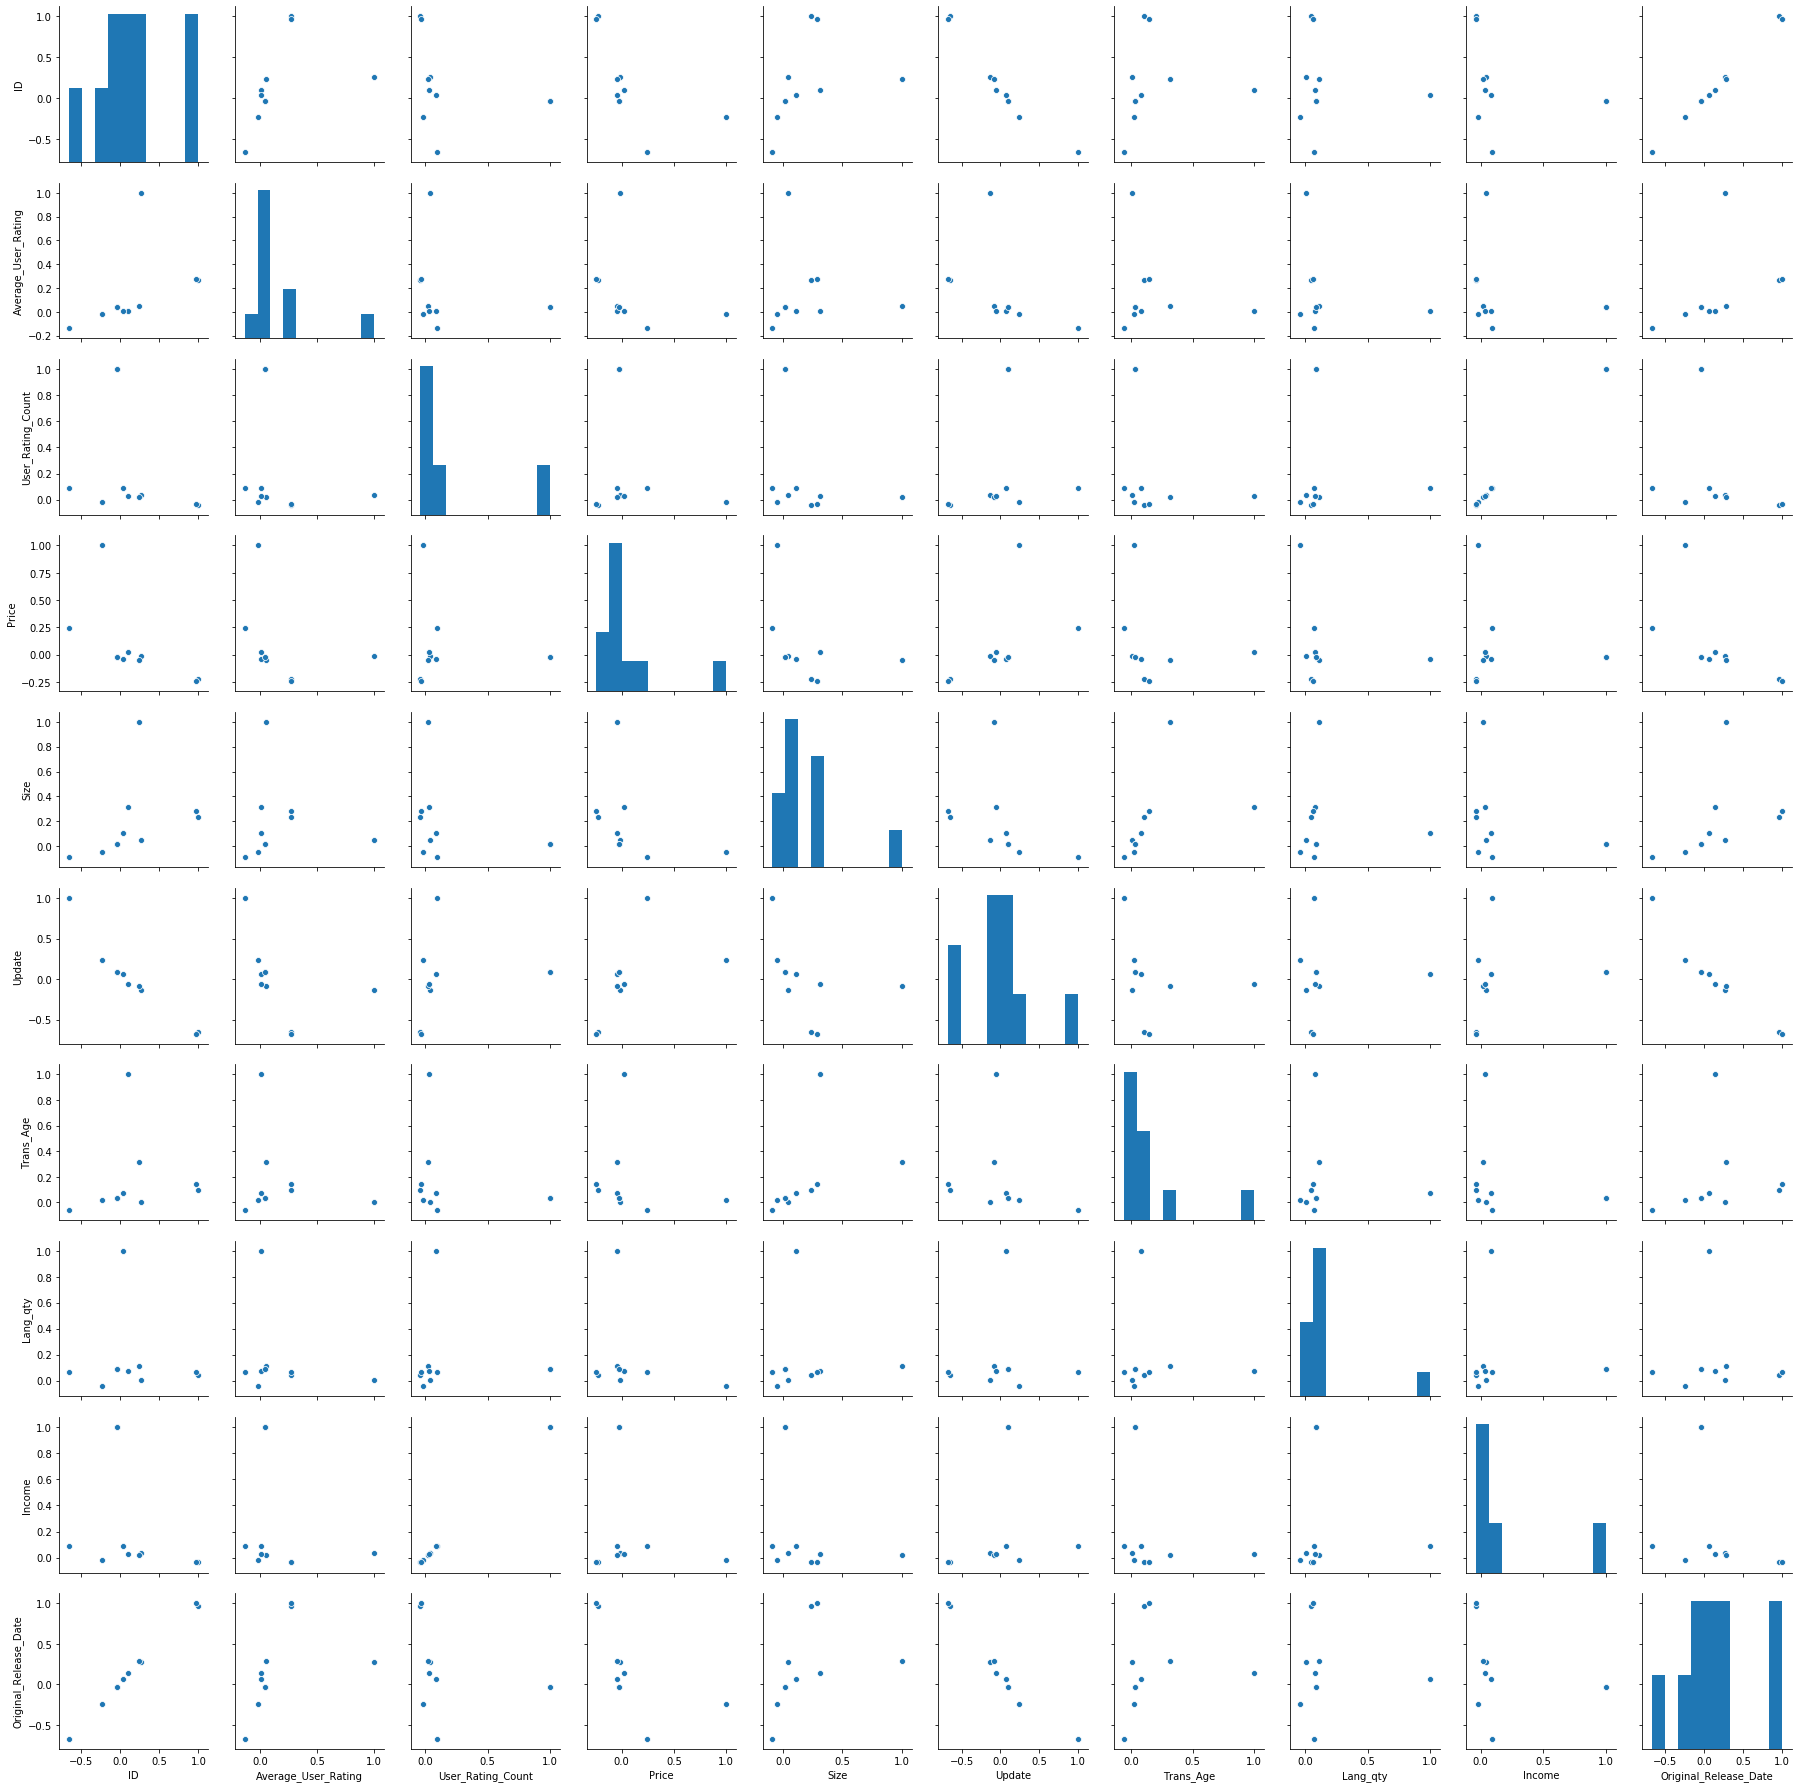

In [12]:
my_figure = sns.pairplot(age4)
print(my_figure)
# my_figure.savefig(os.path.join(os.path.abspath(""), "Age_4_12_corr.png"))

In [13]:
dfd_12_17 =  (df[(df['Price'] < 3) & (df['Average_User_Rating'] >= 4) & (df['Income'] > 46) 
           & (df['User_Rating_Count'] > 46) & (df['Trans_Age'] >= 12)])

age12 = dfd_12_17.corr()
cm = sns.light_palette("green", as_cmap=True)
age12.style.background_gradient(cmap = cm)
# print(age12)
# print()
# print(age12.shape)

,ID,Average_User_Rating,User_Rating_Count,Price,Size,Update,Trans_Age,Lang_qty,Income,Original_Release_Date
ID,1,0.2407,0.00428038,-0.272177,0.18143,-0.684263,0.0334121,0.0967642,0.00427427,0.957471
Average_User_Rating,0.2407,1,0.119639,-0.0405422,0.0305901,-0.113071,-0.0221593,-0.004134,0.119638,0.243043
User_Rating_Count,0.00428038,0.119639,1,-0.0395777,0.200437,0.0813045,0.0760163,0.115426,1,0.00224357
Price,-0.272177,-0.0405422,-0.0395777,1,-0.0340321,0.250266,-0.0628614,-0.103615,-0.0395553,-0.282887
Size,0.18143,0.0305901,0.200437,-0.0340321,1,-0.0904403,-0.0460092,0.0979412,0.200437,0.235019
Update,-0.684263,-0.113071,0.0813045,0.250266,-0.0904403,1,-0.018582,0.0625896,0.0813102,-0.706864
Trans_Age,0.0334121,-0.0221593,0.0760163,-0.0628614,-0.0460092,-0.018582,1,-0.097468,0.0760149,0.00658466
Lang_qty,0.0967642,-0.004134,0.115426,-0.103615,0.0979412,0.0625896,-0.097468,1,0.115424,0.118552
Income,0.00427427,0.119638,1,-0.0395553,0.200437,0.0813102,0.0760149,0.115424,1,0.00223722
Original_Release_Date,0.957471,0.243043,0.00224357,-0.282887,0.235019,-0.706864,0.00658466,0.118552,0.00223722,1


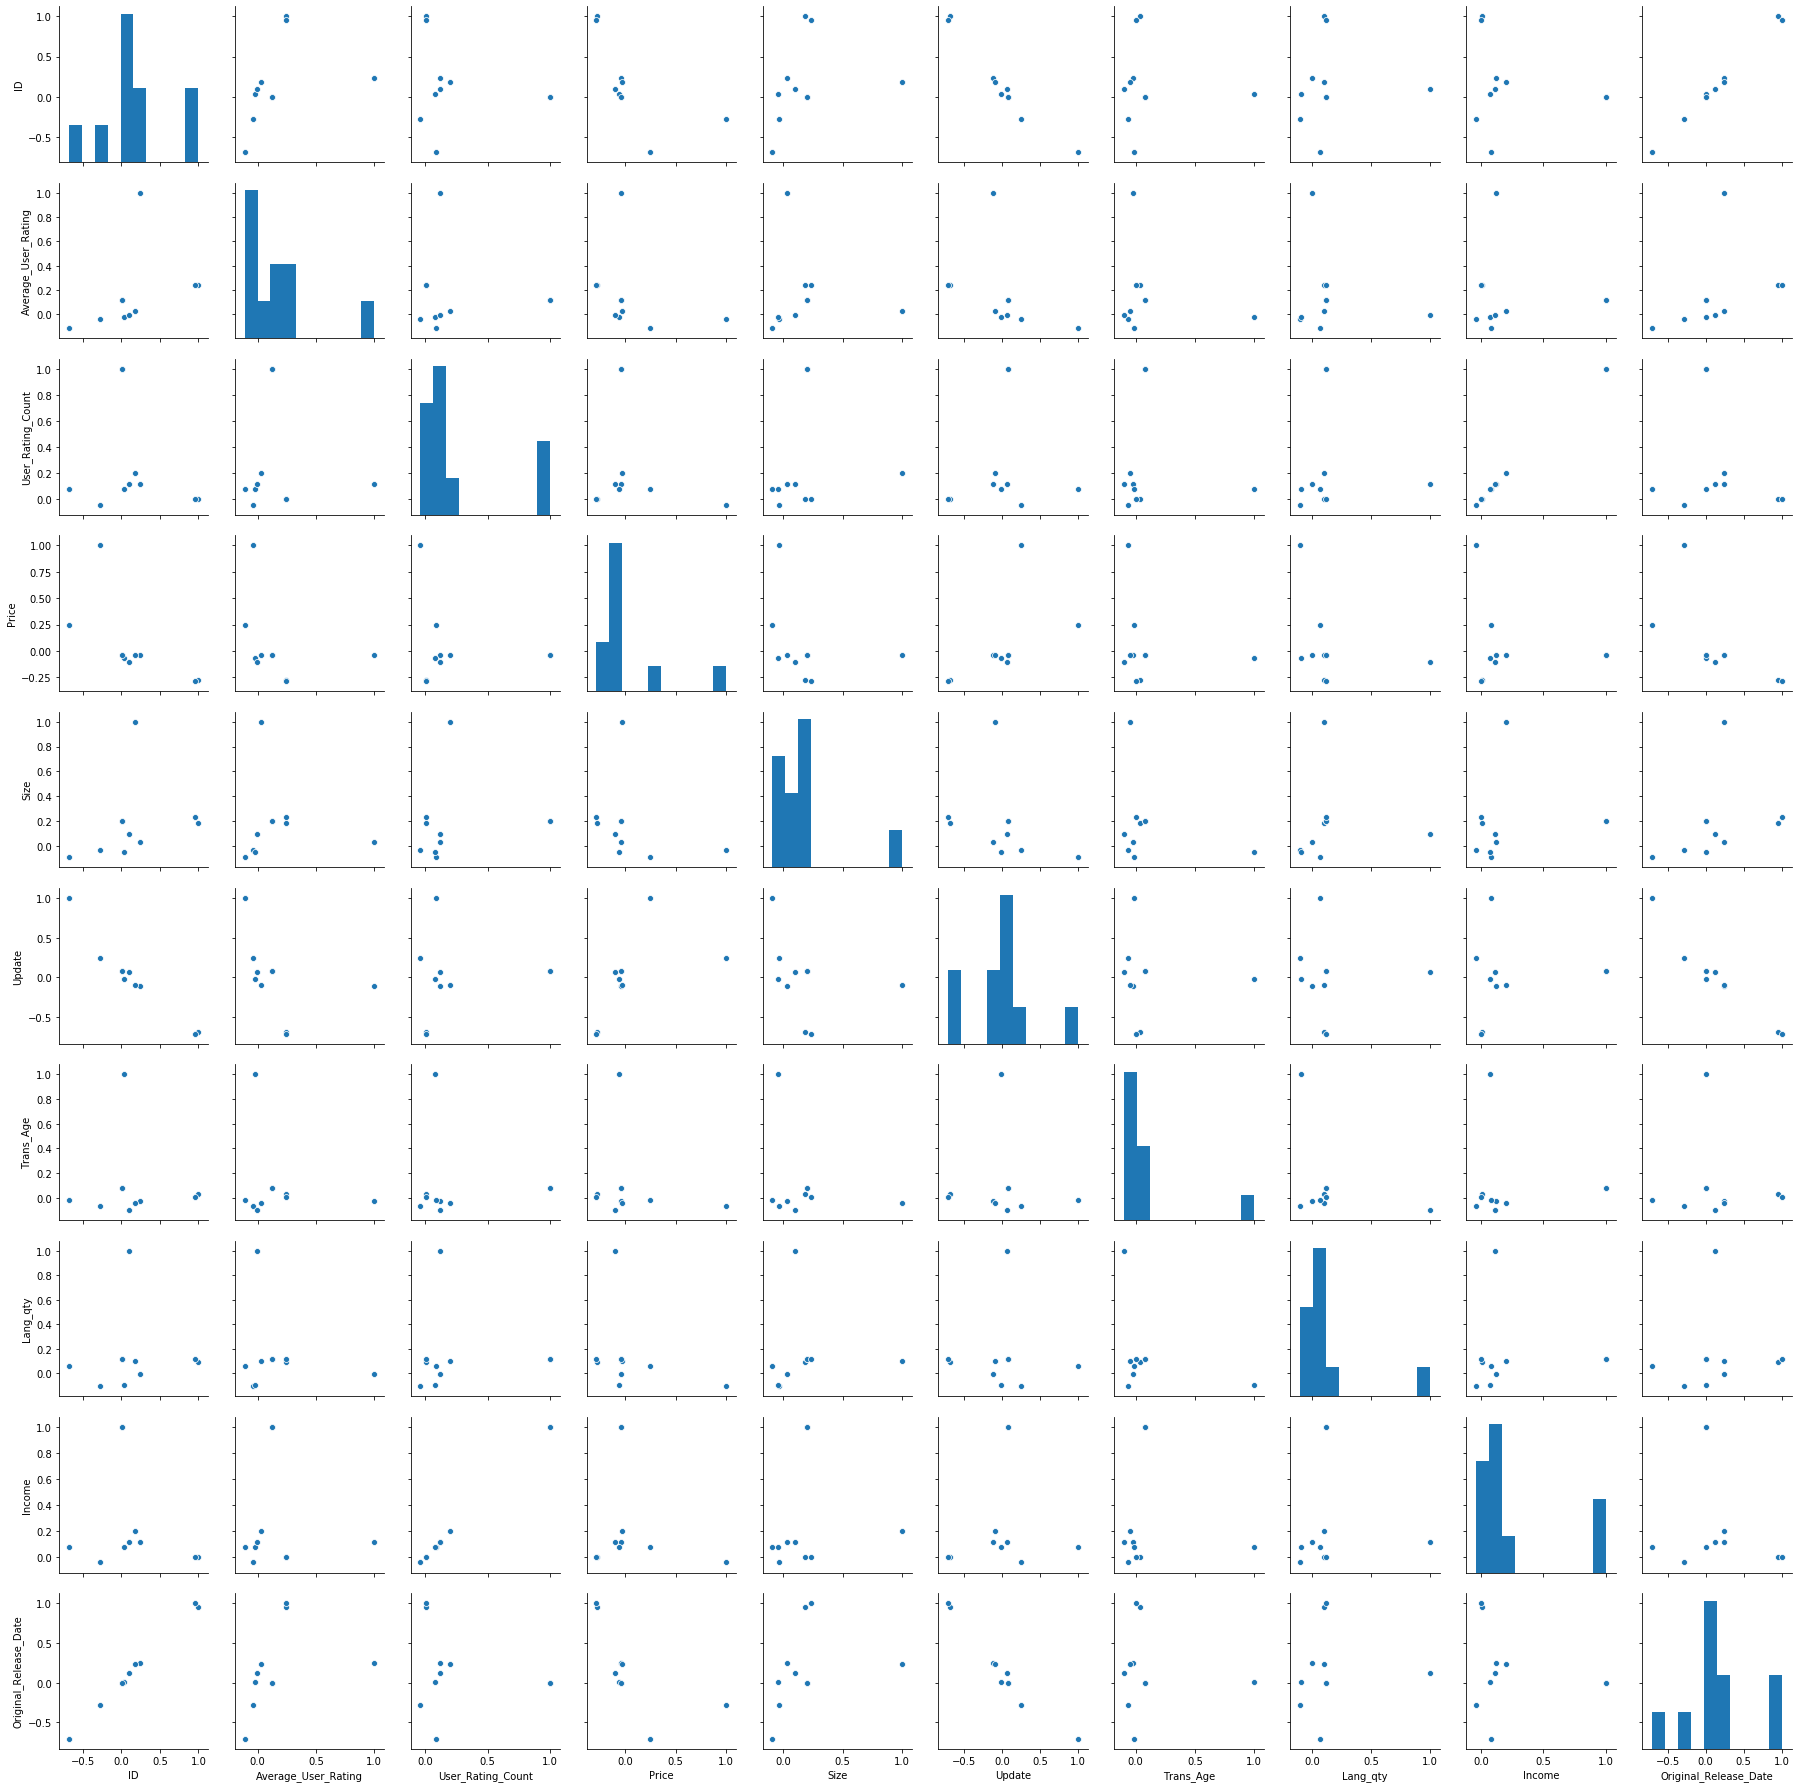

In [14]:
my_figure1 = sns.pairplot(age12)
print(my_figure1)
# my_figure1.savefig(os.path.join(os.path.abspath(""), "Age_12_17_corr.png"))

Figure(432x288)


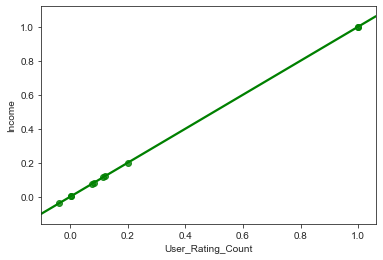

In [15]:
sns.set_style('white')
sns.set_style('ticks')
nazwax = sns.regplot(x = 'User_Rating_Count', y = 'Income', color = 'g', data = age12)
nazwa1 = nazwax.get_figure()
print(nazwa1)
# nazwa1.savefig(os.path.join(os.path.abspath(""), "nazwa1.png"))

Figure(432x288)


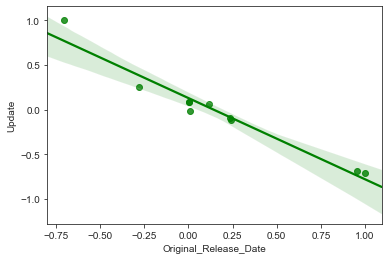

In [16]:
sns.set_style('white')
sns.set_style('ticks')
nazway = sns.regplot(x = 'Original_Release_Date', y = 'Update', color = 'g', data = age12)
nazwa2 = nazwax.get_figure()
print(nazwa2)
# nazwa2.savefig(os.path.join(os.path.abspath(""), "nazwa2.png"))

In [17]:
# No to trzeba zastanowić sie co wybrać i wygenerowac wykresy